In [50]:
import datetime as dt
import os

import src.project_definitions as eb

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
from matplotlib import ticker


from eblib import style, graphs
import eblib.utilities as ut
import eblib.sensor_reader as sr

style.set_rc_eb_standard()

/var/folders/lt/yg_k1j750g57555v73hs91dc0000gn/T/ipykernel_4433/581554085.py:2: DtypeWarning: Columns (12,17,18,19,28,29,64,65,68,69,70,77,78,79,80,81,82,83,84,85,89,90,91,92,93,94,95,105) have mixed types.Specify dtype option on import or set low_memory=False.
  ind = sr.load_tf_bui(eb.files['tf'][bui]['raw'])
/var/folders/lt/yg_k1j750g57555v73hs91dc0000gn/T/ipykernel_4433/581554085.py:2: DtypeWarning: Columns (14,19,49,75,84,94) have mixed types.Specify dtype option on import or set low_memory=False.
  ind = sr.load_tf_bui(eb.files['tf'][bui]['raw'])
/var/folders/lt/yg_k1j750g57555v73hs91dc0000gn/T/ipykernel_4433/581554085.py:2: DtypeWarning: Columns (14,19) have mixed types.Specify dtype option on import or set low_memory=False.
  ind = sr.load_tf_bui(eb.files['tf'][bui]['raw'])


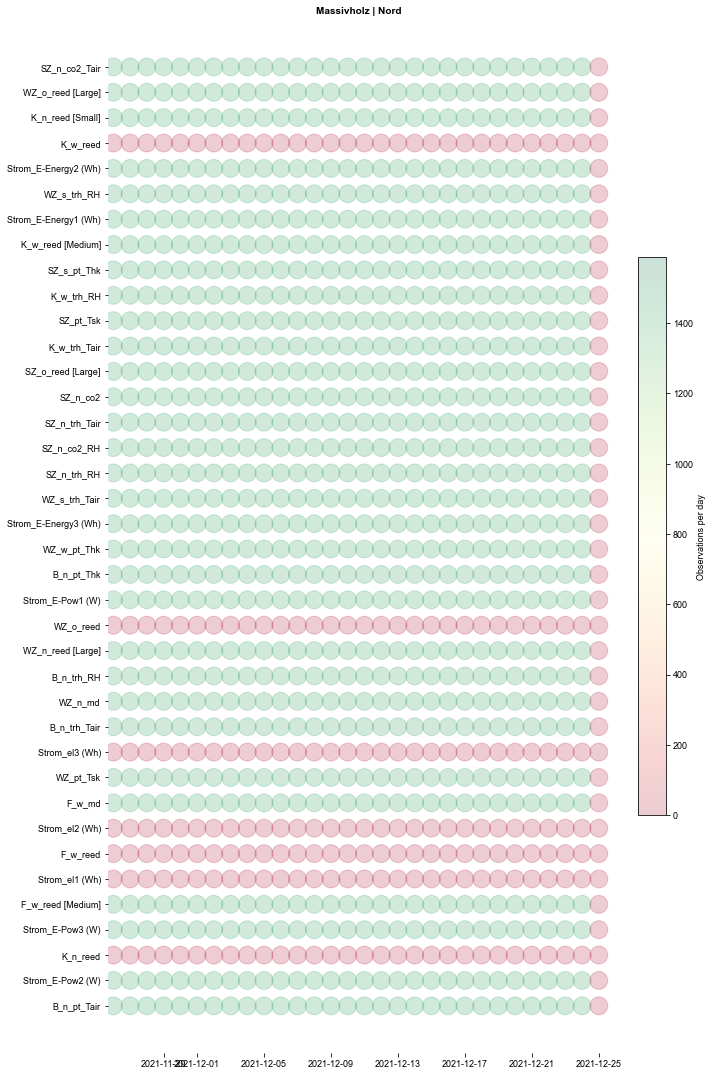

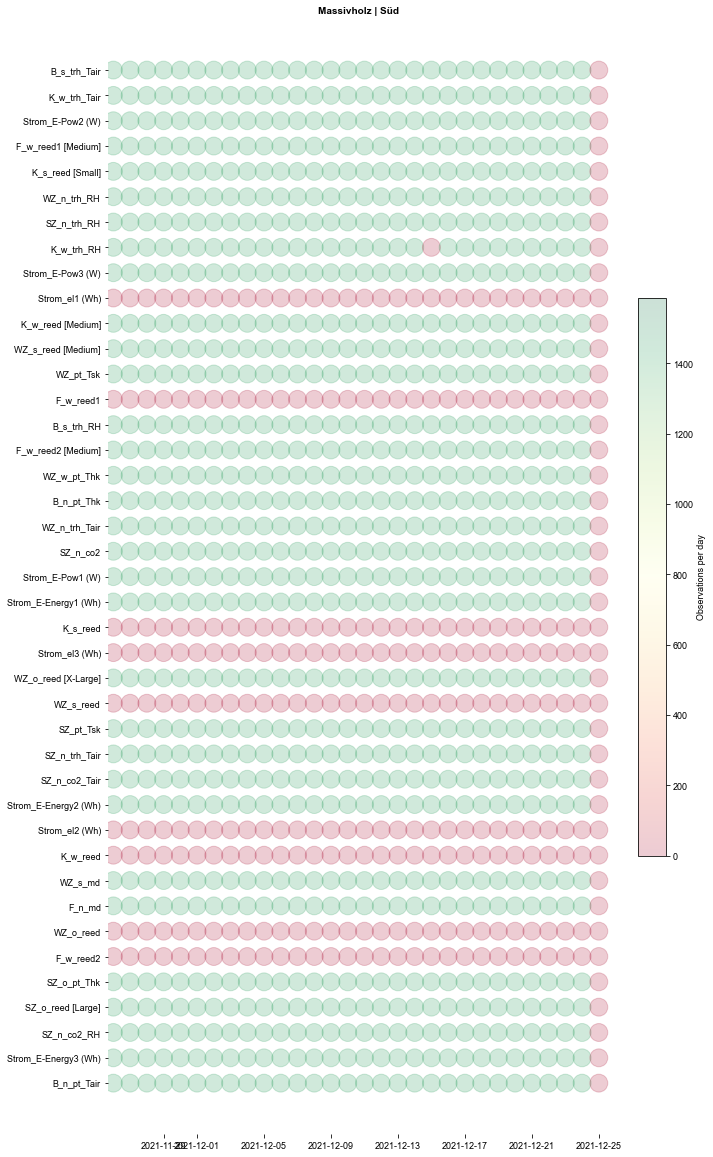

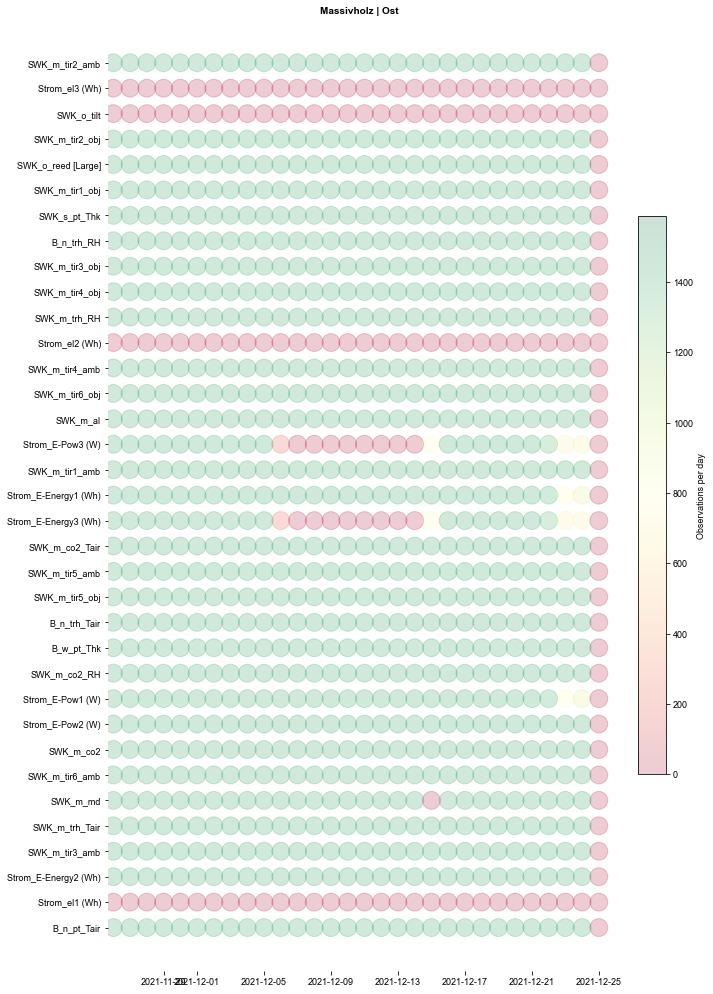

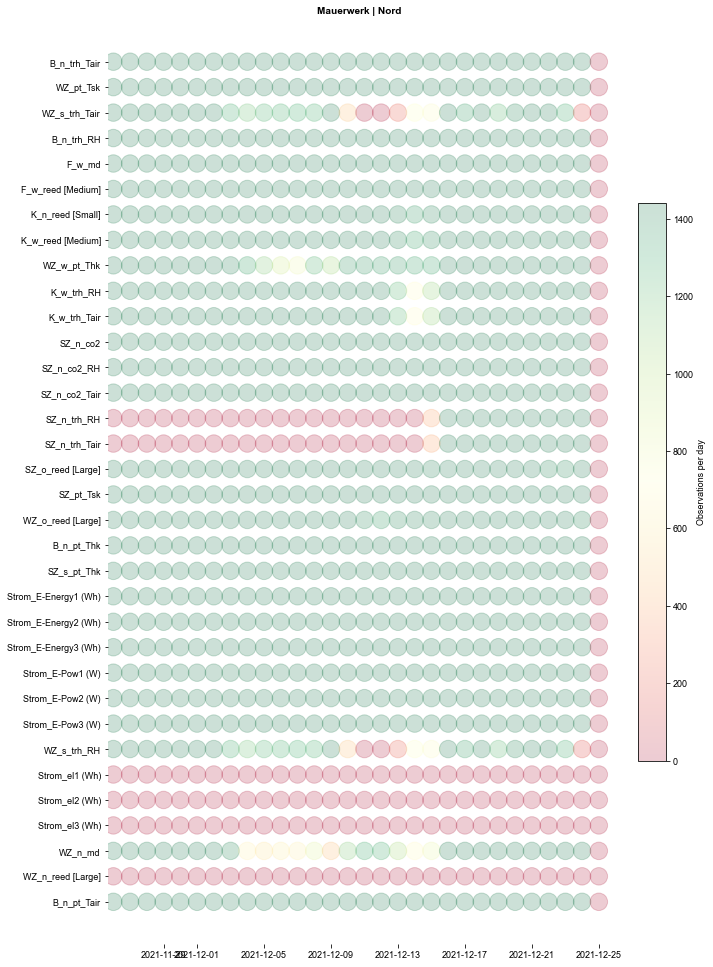

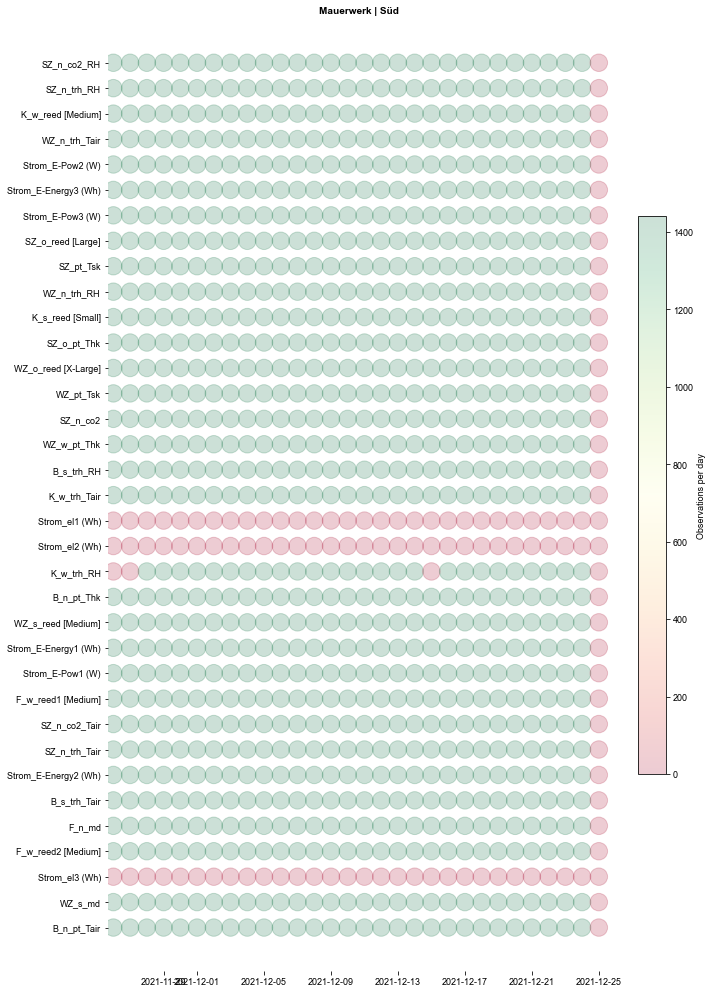

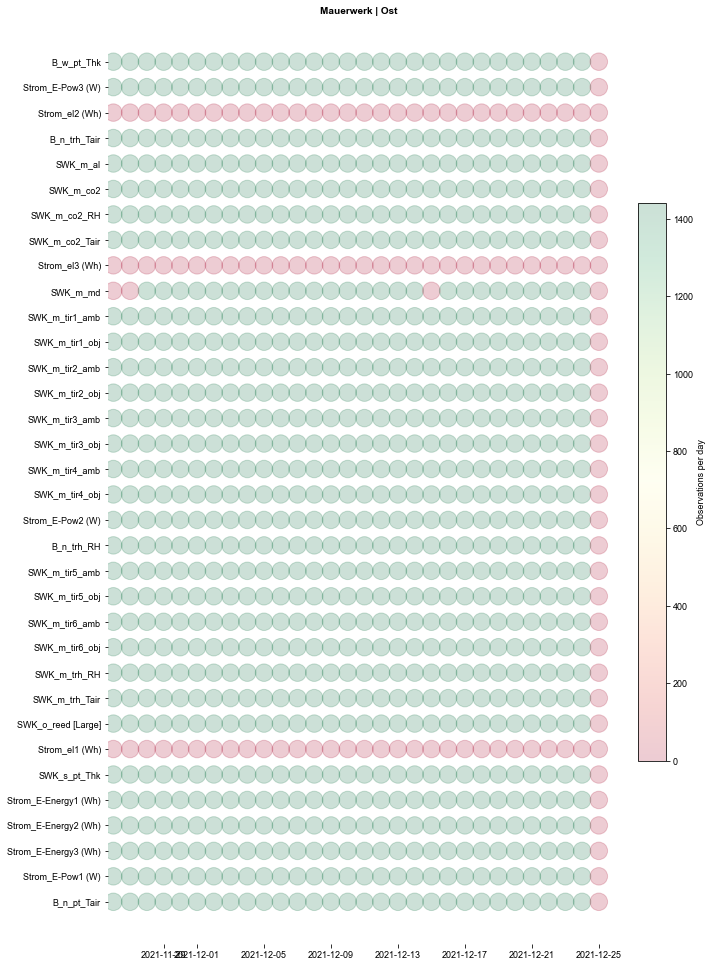

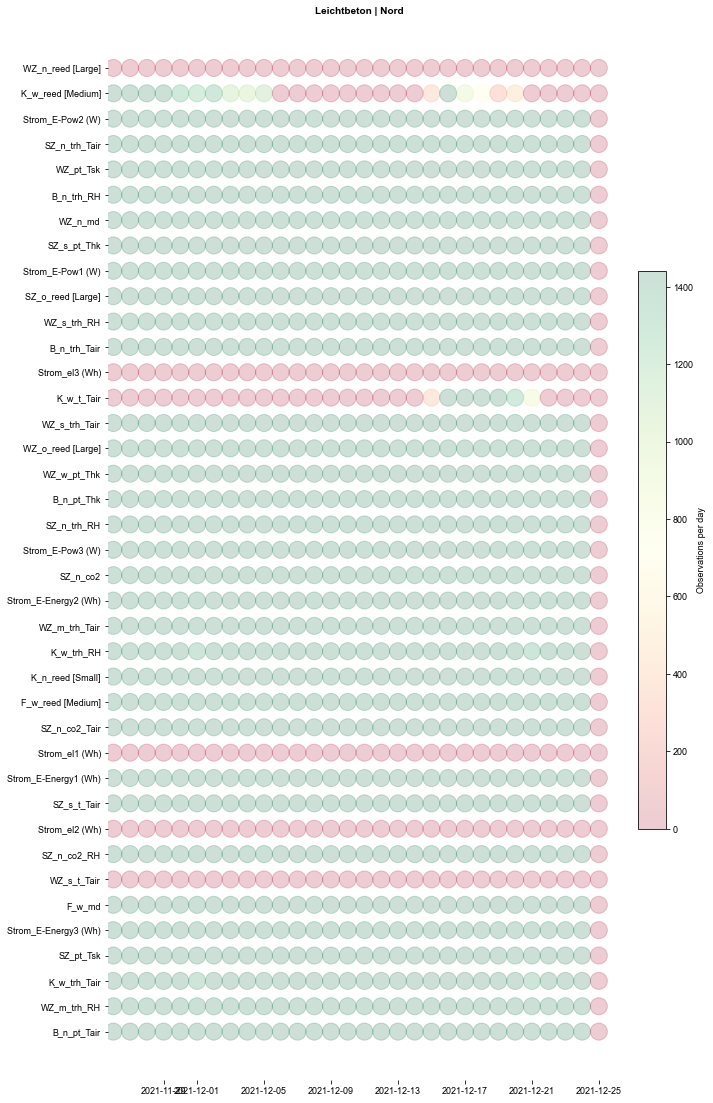

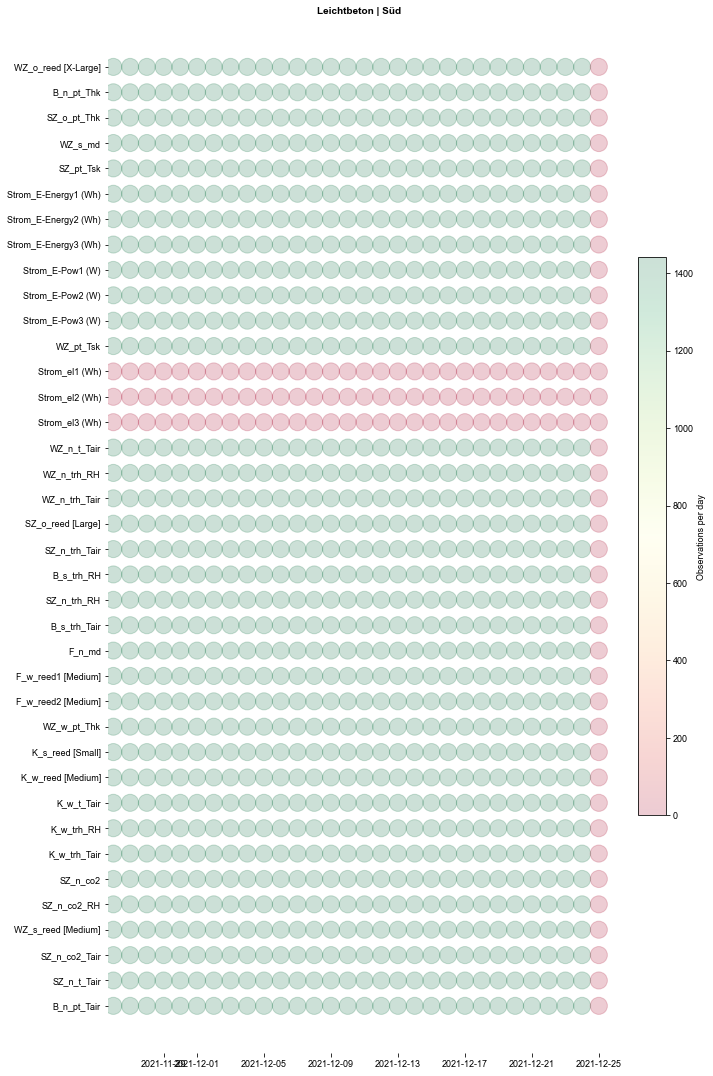

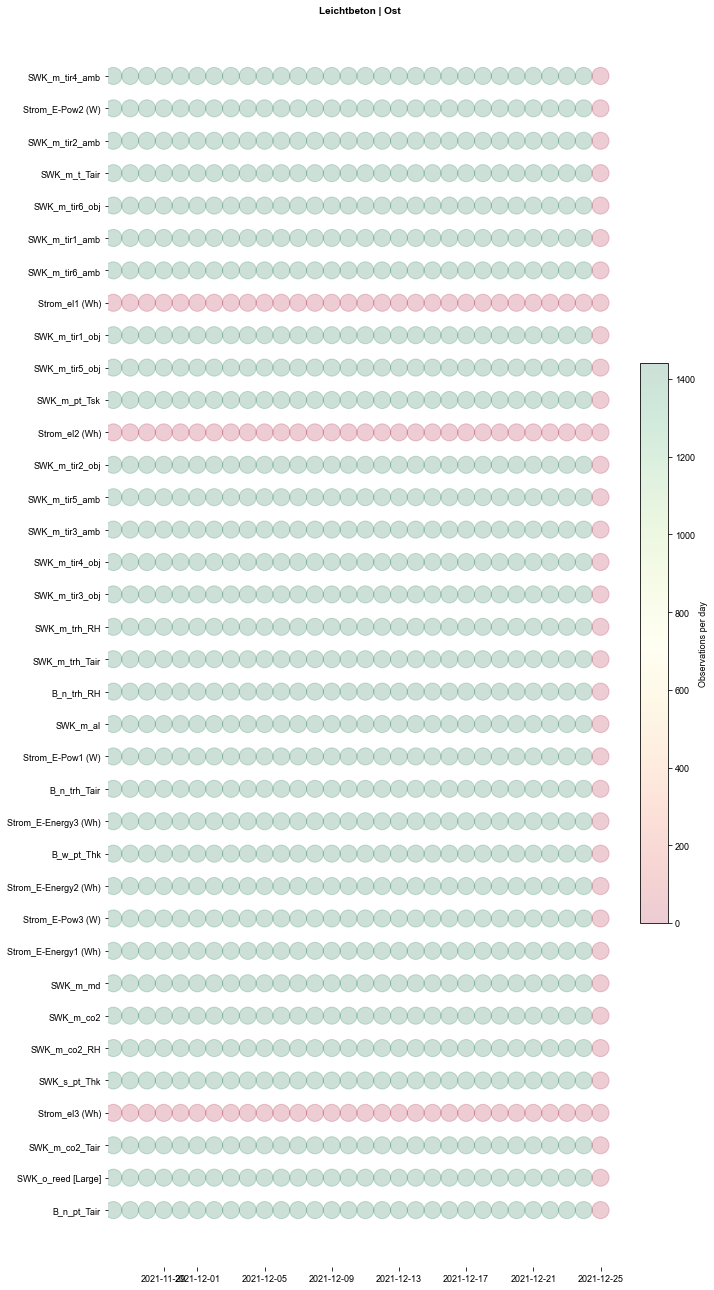

In [51]:
for bui in eb.buid:
    ind = sr.load_tf_bui(eb.files['tf'][bui]['raw'])
    for app in eb.wohnungen:
        fig,ax = plt.subplots()
        ax.set_title(f'{eb.buid[bui]} | {eb.wohnungen[app]}')
        df = ind[app]
        df = df.resample('D').count()
        df.columns = ['_'.join(col).strip() for col in df.columns.values]
        df = df.unstack().reset_index(level=0)
        df.columns = ['Sensor_ID', 'n_data']
        df.sort_index(inplace=True)
        fig.set_figheight(df.Sensor_ID.unique().size*0.5)
        sc = ax.scatter(df.index, df.Sensor_ID, c=df.n_data, s=len(df.index.unique()), alpha=0.2,marker = 'o', cmap='RdYlGn')
        ax.set_xlim(dt.datetime.now()-dt.timedelta(30),dt.datetime.now())
        cbar = fig.colorbar(sc,fraction=.05)
        cbar.set_label("Observations per day")
fig.tight_layout()